# Exercise 01 - Data Processing with Python

##  Introduction

Machine learning is the science of programming computers to learn from data. In order to build sophisticated machine learning models, it is important to prepare the data to learn from beforehand. This Notebook gives an introduction to the required data processing steps applied to the Titanic Survival dataset.

This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the RMS Titanic. 

![RMS Titanic departing Southampton on April 10, 1912.](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/640px-RMS_Titanic_3.jpg)







## Objectives
After this exercise you should be familiar with the following operations, which are needed when you work with data.
 * Data loading
 * Data viewing
 * Data cleaning
 * Data slicing
 * Data mapping

In this exercise we'll be using mainly *pandas*  and *numpy* for data processing, *scikit-learn* for data analysis and *seaborn/matplotlib* for visualization respectively.

## Why do we use Python?

![Python vs R](https://i.redd.it/6u6ko8vts2h81.jpg)
* Since 2021, Python is the most popular programming language
* Every important Deep Learing Library uses Python
* Nearly all ML-research is done in Python

* A lot of  libraries make Python applicable to every step of the data science process like
    * data management,
    * analytical processing, and 
    * visualization libraries.
* View of ML-Team. Currently, there is no alternative to Python

     
 * **Java**
 ```java
 public class HelloWorld {
         public static void main(String[] args) {
             System.out.println("Hello World");
         }
 }
 ```
 
 * **Python**
 ```python
 print('Hello World')
 ```
 * **C**
 ```
 #include "stdio.h"
 int main() {
 int x = 3
 int y = 4
 printf("%s"\n,x+y);
 }
 ```    
 * **Python**
 ```python
 x = 3
 y = 4
 print(x+y)
  ```

## Getting Started with the Dataset

For this exercise we'll be using the Titanic data set.
It contains the passenger data from the RMS Titanic, including whether a passenger survived the sinking of the ship or not.
The dataset can be downloaded from [Kaggle](https://www.kaggle.com/c/3136/download-all).

**Our goal is to create a model to predict whether a passenger survived or not based on the given attributes.**

In [1]:
# Import required Packages
import pandas as pd # "Excel" in python
import numpy as np # fast mathematical operations
import seaborn as sns # visualization tool
from collections import Counter #
import matplotlib.pyplot as plt # visualization tool
import sklearn # machine learning library containing nearly all ML-algorithms (not suitable for deep learning with neural nets)

*If you are using Google Colab, press on the left the folder symbol and  upload train.csv and test.csv*


Now we can use the dataset and start analyzing it.


In [2]:
# Load the train and test datasets from the CSV files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Combine the datasets for training and testing to one full data set
full_data = [train, test]

# Display the first 5 rows of the train data set
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Print the columns of the data frame
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

 *  **Survived**: Outcome of survival (int: 0 = No; 1 = Yes) 
 *  **Pclass**: Socio-economic class (int: 1 = Upper class; 2 = Middle class; 3 = Lower class)
 * **Name**: Name of passenger (string)
 * **Sex**: Sex of the passenger (string)
 * **Age**: Age of the passenger (float: Some entries contain NaN)
 * **SibSp**: Number of siblings and spouses of the passenger aboard (int)
 * **Parch**: Number of parents and children of the passenger aboard (int)
 * **Ticket**: Ticket number of the passenger (string)
 * **Fare**: Fare paid by the passenger (float)
 * **Cabin** Cabin number of the passenger (string: Some entries contain NaN)
 * **Embarked**: Port of embarkation of the passenger (string: C = Cherbourg; Q = Queenstown; S = Southampton)


Inspect the data, *info* can be used to show how complete or incomplete the dataset is

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


To display information about a specific passenger, we can select a row with the following command:

In [5]:
# iloc: index location
train.iloc[15]

PassengerId                                  16
Survived                                      1
Pclass                                        2
Name           Hewlett, Mrs. (Mary D Kingcome) 
Sex                                      female
Age                                        55.0
SibSp                                         0
Parch                                         0
Ticket                                   248706
Fare                                       16.0
Cabin                                       NaN
Embarked                                      S
Name: 15, dtype: object

In [6]:
# Retrieve n number of samples from the data set
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C


In [7]:
# Retrieve a statistical description of the data set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the sinking of the RMS Titanic. We can also see that the passenger ages range from 0.4 years to 80 years.


From the tables above, we can note a few things:
1. We need to convert a lot of features into numeric ones
2. We can see that the features have widely different ranges
3. We can detect some features, that contain missing values

## Visualizing the Data

After a look at the tables and the description of our datasets we can't say a lot about the data yet. We are unaware of the distribution and correlation of the variables regarding the chances of survival for any given passenger.
To get a better understanding about the dataset and its variables, it is helpful to visualize it.

A good tool to visualize data using Python is the library *matplotlib*. It is well [documented](https://matplotlib.org/) and allows for extensive customizability.

Additionally we will introduce [*seaborn*](https://seaborn.pydata.org/), a wrapper which uses matplotlib, but offers a higher-level interface for visualizing data.

*Note: other visualization libraries for python exist, that are equally suitable (e.g. https://plotly.com/python/)*

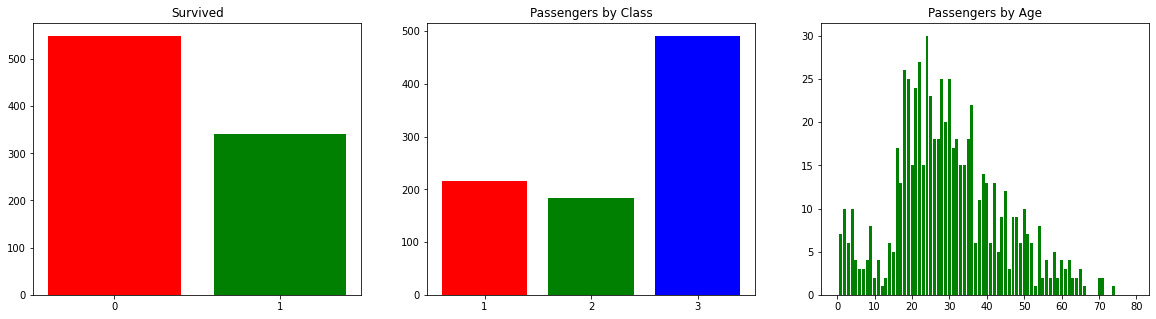

In [8]:
# First we start off with matplotlib and setup the figures and plots
f,ax = plt.subplots(1,3,figsize=(20,5))
colors = ["r", "g", "b"]

# Now we look at some general distributions of the data.

# Survived Class
x_survived = [0,1]
y_survived = [np.where(train["Survived"] == (i))[0].size for i in x_survived]

# equivalent to
# y_survived = [0,0]
# for i in train["Survived"]:
#    y_survived[i] +=1

ax[0].bar(x_survived, y_survived, color=colors)
ax[0].set_xticks(x_survived)
ax[0].set_title('Survived')

# Passenger Class
x_pclass = [1, 2, 3]
y_pclass = [np.where(train["Pclass"] == (i))[0].size for i in x_pclass]
ax[1].bar(x_pclass, y_pclass, color=colors)
ax[1].set_xticks(x_pclass)
ax[1].set_title('Passengers by Class')

# Age
x_age = np.arange(0, 80)
y_age = [np.where(train["Age"] == (i))[0].size for i in x_age]
ax[2].bar(x_age, y_age, color="green")
ax[2].set_xticks(np.arange(0, 81, 10))
ax[2].set_title('Passengers by Age')

# Display the graphs
plt.show()

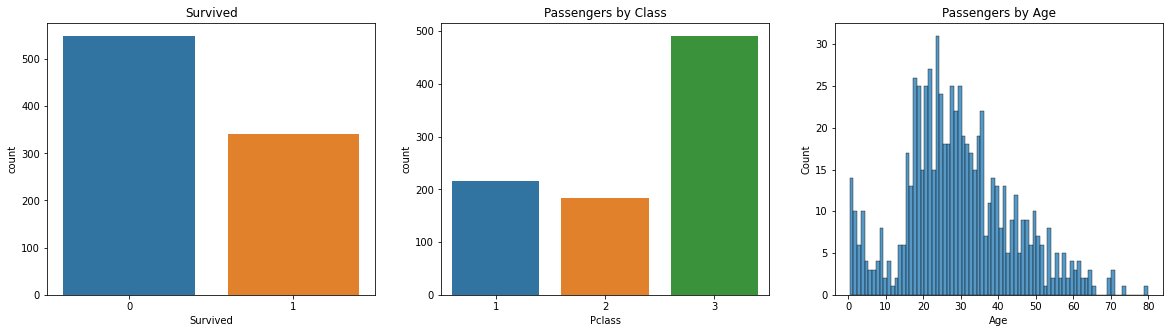

In [9]:
# The categorical histograms we created with matplotlib can be created with the
# "countplot" command in seaborn. The setup is very similar, but easier.

f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(x='Survived',data=train,ax=ax[0])
ax[0].set_title('Survived')

sns.countplot(x='Pclass',data=train,ax=ax[1])
ax[1].set_title('Passengers by Class')

sns.histplot(train['Age'].dropna(),ax=ax[2],bins=80)
ax[2].set_title('Passengers by Age');

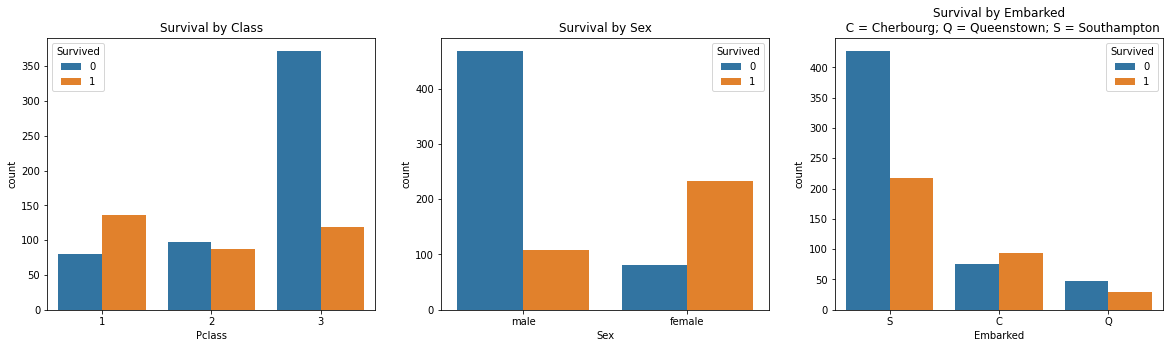

In [10]:
# Now we are going to use various plot options of seaborn to 
# look at survival rates based on other attributes:
f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax[0])
ax[0].set_title('Survival by Class')

sns.countplot(x='Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Survival by Sex')

sns.countplot(x='Embarked',hue='Survived',data=train,ax=ax[2])
ax[2].set_title('Survival by Embarked\n  C = Cherbourg; Q = Queenstown; S = Southampton');

But careful. The input data is correlated

<AxesSubplot:xlabel='Sex', ylabel='count'>

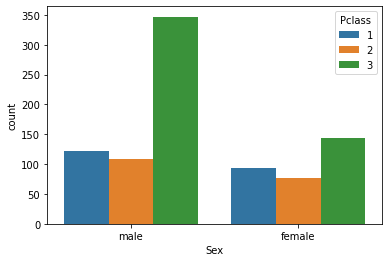

In [11]:
sns.countplot(x="Sex", hue="Pclass", data=train)

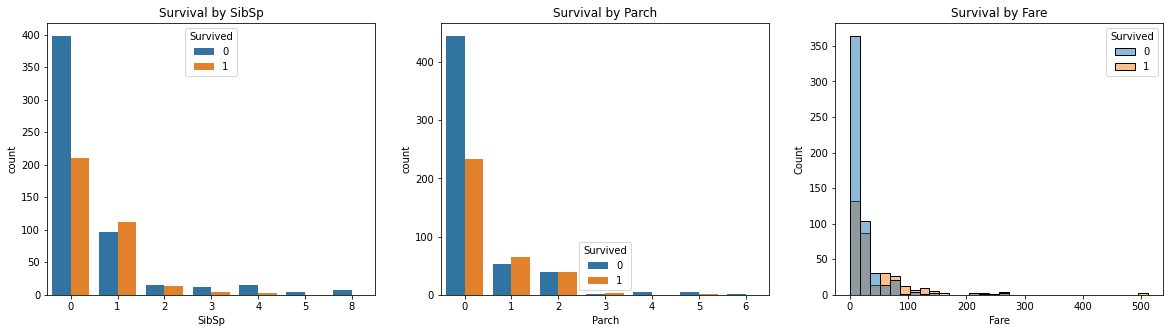

In [12]:
f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(x='SibSp',hue='Survived',data=train,ax=ax[0])
ax[0].set_title('Survival by SibSp')

sns.countplot(x='Parch',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Survival by Parch')

sns.histplot(x='Fare',hue='Survived',data=train,ax=ax[2],kde=False,bins=30)
ax[2].set_title('Survival by Fare');

This was only a quick overview of the relationship between features before we start a more detailed analysis in the following sections.

## Cleaning the Data
Data from the real world is messy. Normally there are missing values, outliers and invalid data (e.g. negative values for age) in a data set. We can solve problems with data quality by replacing these values, trying to close the gap by interpolation or by dropping the respective entries. 


### Detecting and Filtering Outliers

Outliers that are either very large or small skew the overall view of the data. One way of detecting outliers could be the use of the standard deviation. If we assume that the data is normally distributed, then 95 percent of the data is within 1.96 standard deviations of the mean. So we can drop the values either above or below that range.

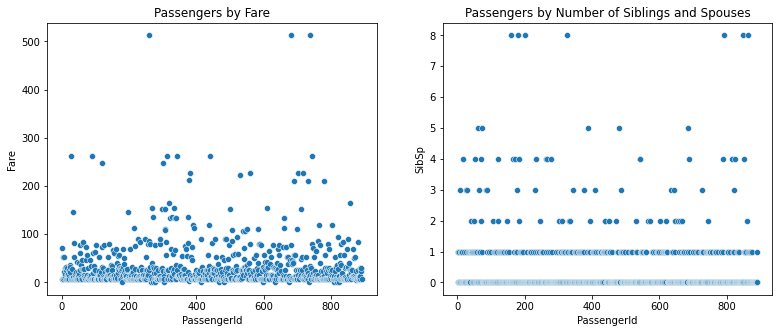

In [13]:
f,ax = plt.subplots(1,2,figsize=(13,5))

# The outliers in Fare (Fare paid by the passenger)
sns.scatterplot(x="PassengerId",y="Fare",data=train,ax=ax[0])

# The outliers in SibSp(Number of siblings and spouses of the passenger aboard)
sns.scatterplot(x="PassengerId",y="SibSp",data=train, ax=ax[1])
ax[0].set_title('Passengers by Fare')
ax[1].set_title('Passengers by Number of Siblings and Spouses');

Assume a normal distribution. Everything outside of 95% is an outlier
![95%](https://upload.wikimedia.org/wikipedia/commons/b/bf/NormalDist1.96.png)

In [14]:
# Outlier detection Method 1 using Standard Deviation
# If we assume a normal distribution, 95% of the area lies in 1.96*std (close two double the standard deviation)
def detect_outliers_sd(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # mean
        mean = df[col].mean()
        # standard deviation
        std = df[col].std()
        # the upper bound
        top = mean + std * 1.96
        #  the lower bound 
        bot = mean - std * 1.96
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < bot) | (df[col] > top)].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

Use Interquartile range 1.5*IQR

![iqr](https://miro.medium.com/max/1100/1*ofWRZjCVfJbK0zyt_6LcEA.png)

In [15]:
# Outlier detection Method 2 using Interquartile Ranges 
def detect_outliers_iqr(df, n ,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col] ,75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

Detect outliers ...

In [16]:
# detect outliers from Age, SibSp, Parch and Fare. Display all, that are outliers in 2 or more columns
outliers_to_drop = detect_outliers_iqr(train,2,["Age","SibSp","Parch","Fare"])
train.loc[outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


... and remove them

In [17]:
# Drop the outliers
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop=True)

### Complementary functions

Most	Machine	Learning	algorithms	cannot	work	with missing values,	so	let’s	create a few	functions	to take	care	of	the missing values.

In [18]:
# The .info function shows how complete or incomplete the datasets are. 
print(train.isnull().sum())
print('-'*30)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can complete missing data by calculating:
* mean, 
* median, or 
* mean + randomized standard deviation.  

Before we can complete the missing data, we should decide which method is best based on the description of the data.

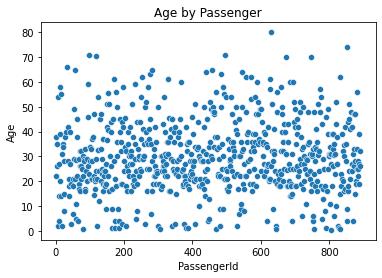

In [19]:
# The outliers in Age 
sns.scatterplot(x=train["PassengerId"], y=train["Age"])
plt.title('Age by Passenger');

To complete the missing data of *Age*, we use the mean + randomized standard deviation, where the standard deviation describes the spread of the data.

In [20]:
# Fill the missing data in Age using mean + randomized standard deviation. 
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    print("mean age is = ", age_avg)
    age_std = dataset['Age'].std()
    print("standard deviation is = ", age_std)
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)  
    print("randomly generated ages are = ", age_null_random_list[0:10])
    df_age = dataset['Age'].copy()
    df_age[np.isnan(df_age)] = [age_null_random_list]
    dataset['Age'] = df_age.astype(int)

mean age is =  29.69911764705882
standard deviation is =  14.526497332334042
randomly generated ages are =  [15 41 17 24 42 35 17 26 26 43]
mean age is =  30.272590361445783
standard deviation is =  14.181209235624422
randomly generated ages are =  [20 37 41 42 41 38 28 40 26 16]


Information of the Fare attribute

In [21]:
# The Description of Fare
print ("median {}".format(train['Fare'].median()))
train['Fare'].describe()

median 14.4542


count    881.000000
mean      31.121566
std       47.996249
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [22]:
# Fill the missing data in Fare using median standard deviation.
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

Before we fill the missing data in the Embarked, we will visualize it to decide which option is best to use

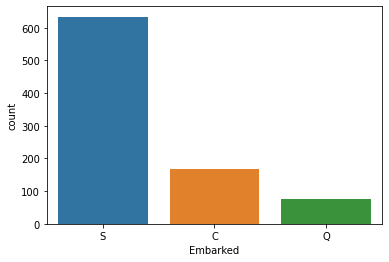

In [23]:
sns.countplot(x='Embarked',data=train);

In [24]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

Let us check again if there are any missing values

In [25]:
# update the dataframes
train = full_data[0]
test = full_data[1]
# any: detects if a cell matches a condition
print(train.isnull().any())
print('-'*30)
print(test.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool
------------------------------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


Great! Nothing (important) is missing, and we did not have to remove any rows.

## Feature Engineering
Qualitative data is often nominal (e.g. names) or categorical (e.g. sex). Those can't be ordered and are difficult to evaluate. Therefore we want to convert all our categorial data to quantitiative data, i.e. numerical or ordinal values.

We can convert the names to an attribute based on their length:

In [26]:
for dataset in full_data:
    try:
        dataset['Name_length'] = dataset['Name'].apply(len)
    except:
        print("Name_length feature is located in the data frame")
        
train['Name_length'].head()

0    23
1    51
2    22
3    44
4    24
Name: Name_length, dtype: int64

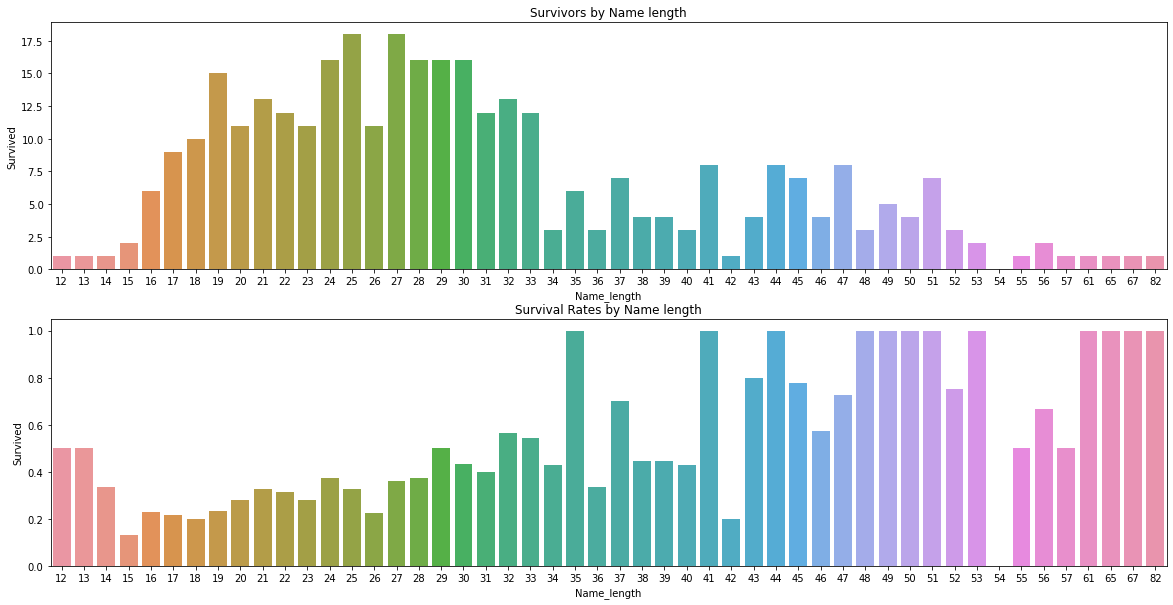

In [27]:
fig, ax = plt.subplots(2,1,figsize=(20,10))

# The amount of survived people by Name length.
sum_survived_by_name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).sum()
sns.barplot(x='Name_length', y='Survived', data=sum_survived_by_name, ax = ax[0])
ax[0].set_title('Survivors by Name length')

# The amount of survived people by Name length.
avg_survived_by_name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=avg_survived_by_name, ax = ax[1])
ax[1].set_title('Survival Rates by Name length');

From the graphics above we can see that passengers with longer names were more likely to survive, perhaps the cause is that rich families tend to have longer names.

It can also be helpful to create meaningful "bins" for attributes. Therefore we will divide the Name_length feature into small classes. Each of these classes has a similar rate to survive.

In [28]:
for dataset in full_data:
    dataset.loc[dataset['Name_length'] <= 23, 'Name_length']= 0
    dataset.loc[(dataset['Name_length'] > 23) & (dataset['Name_length'] <= 28), 'Name_length']= 1
    dataset.loc[(dataset['Name_length'] > 28) & (dataset['Name_length'] <= 40), 'Name_length']= 2
    dataset.loc[dataset['Name_length'] > 40, 'Name_length'] = 3
train['Name_length'].value_counts()

0    360
1    240
2    201
3     90
Name: Name_length, dtype: int64

As a next step we can map categorical attributes to a numerical discrete value:



In [29]:
# Mapping Gender
for dataset in full_data:
    # np.where takes as input a list of Booleans, a new value and a backup value
    try:
        dataset['Sex'] = np.where(dataset['Sex']=='female', 1, 0)
    except:
        print('The value is already converted ')
train['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int32

For example we can look at the *Age* attribute:


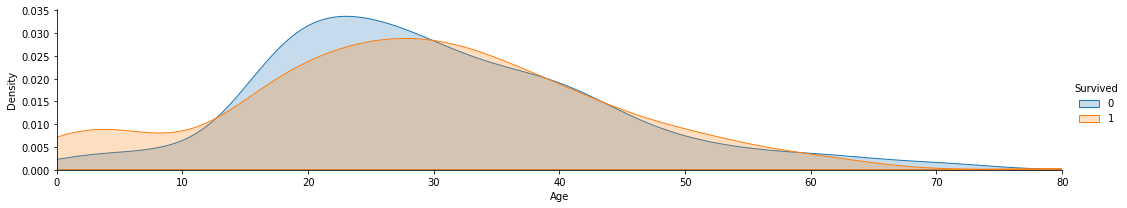

In [30]:
#plot distributions of passengers who survived or died by age
a = sns.FacetGrid(data=train, hue='Survived', aspect=5)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, train['Age'].max()))
a.add_legend();

We can see that until the age of 14 the chance of survival is higher than the chance to die.
In reverse the chance for dying is higher between the age of 14 and 30. This changes a couple of times between various ages.

Therefore the best categories for age are:
* 0: less than 14
* 1: 14 to 30
* 2: 30 to 40
* 3: 40 to 50
* 4: 50 to 60
* 5: 60 and more

In [31]:
for dataset in full_data:
    dataset.loc[ dataset['Age'] <= 14, 'Age_bin'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age_bin'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age_bin'] = 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age_bin'] = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age_bin'] = 4
    dataset.loc[ dataset['Age'] > 60, 'Age_bin'] = 5
train['Age_bin'].value_counts()

1.0    435
2.0    204
3.0    110
0.0     78
4.0     42
5.0     22
Name: Age_bin, dtype: int64

The next step is to map the Embarked feature: 

In [32]:
# Mapping Embarked
for dataset in full_data:
  try:
      dataset.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
  except:
      print('The value is already converted ')
train['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

Additionally data might be skewed. For example, if we look at the *Fare* attribute, we can see it is heavily skewed to the left:

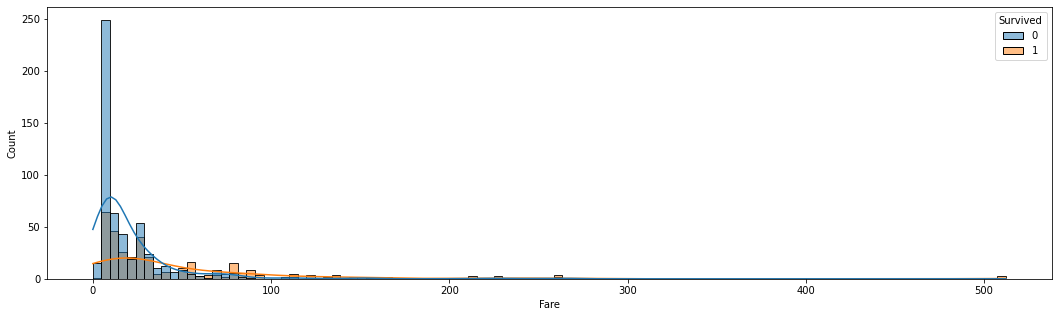

In [33]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(x=train['Fare'],hue='Survived',data=train,kde=True);

To reduce the skewness of this attribute, we can transform it with the log function. This redistributes the data:

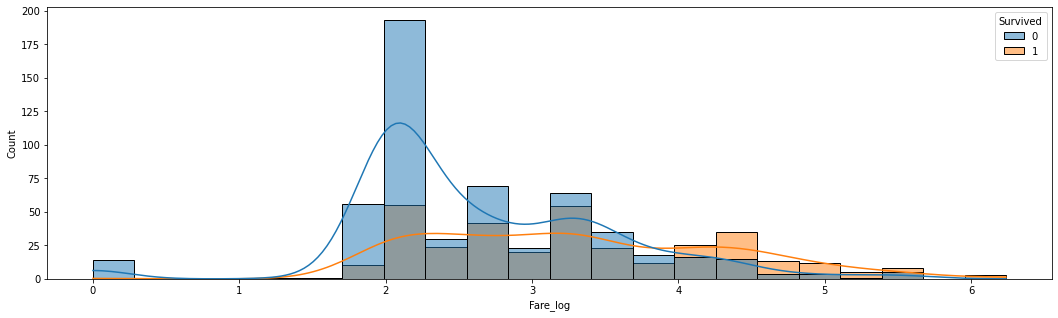

In [34]:
# Apply log to Fare to reduce skewness distribution
for dataset in full_data:
    dataset["Fare_log"] = dataset["Fare"].map(lambda i: np.log(i) if i > 1 else 0)
    
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(x=train['Fare_log'],hue='Survived',data=train,kde=True);

Now we can define bins more easily:
The survival rate is lower for a *Fare_log* value of less than 3.8 and higher for values greater than 3.8.

In [35]:
for dataset in full_data:
    dataset.loc[ dataset['Fare_log'] <= 3.8, 'Fare_bin'] = 0
    dataset.loc[ dataset['Fare_log'] > 3.8, 'Fare_bin'] = 1
    dataset['Fare_bin'] = dataset['Fare_bin'].astype(int)
train['Fare_bin'].value_counts()

0    720
1    171
Name: Fare_bin, dtype: int64

In [36]:
# Print the first 5 rows of the updated dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,0,1.0,1.981001,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,2.0,4.266662,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1.0,2.070022,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,2.0,3.972177,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,2.0,2.085672,0


## Feature Selection

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

Fewer attributes are desirable because it reduces the complexity of the model, and a simpler model is simpler to understand and explain.

*Which features within the dataset contribute significantly to our goal?* 


To calculate the covariance matrix, we should first remove all remaining string attributes:



In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Name_length  891 non-null    int64  
 13  Age_bin      891 non-null    float64
 14  Fare_log     891 non-null    float64
 15  Fare_bin     891 non-null    int32  
dtypes: float64(3), int32(3), int64(7), object(3)
memory usage: 101.1+ KB


we will drop the following features:
* Name
* Ticket
* Cabin

In [38]:
# Feature selection
drop_elements = [ 'Name', 'Ticket', 'Cabin']
try: 
  train = train.drop(drop_elements, axis = 1)
  test  = test.drop(drop_elements, axis = 1)
except:
  print("The features are already removed.")

We can examine the data after removing the features.

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,0,22,1,0,7.2500,0,0,1.0,1.981001,0
1,2,1,1,1,38,1,0,71.2833,1,3,2.0,4.266662,1
2,3,1,3,1,26,0,0,7.9250,0,0,1.0,2.070022,0
3,4,1,1,1,35,1,0,53.1000,0,3,2.0,3.972177,1
4,5,0,3,0,35,0,0,8.0500,0,1,2.0,2.085672,0


### Correlation analysis - Multi-variate analysis
* Basically, correlation measures how closely two variables move in the same direction. Therefore we try to find whether there is a correlation between a feature and a label. In other words as the feature values change does the label change as well, and vice-versa?

* The data may contain a lot of information redundancy distributed among multiple variables, which is a problem called multivariate correllation.

#### Heatmap for the correlation matrix

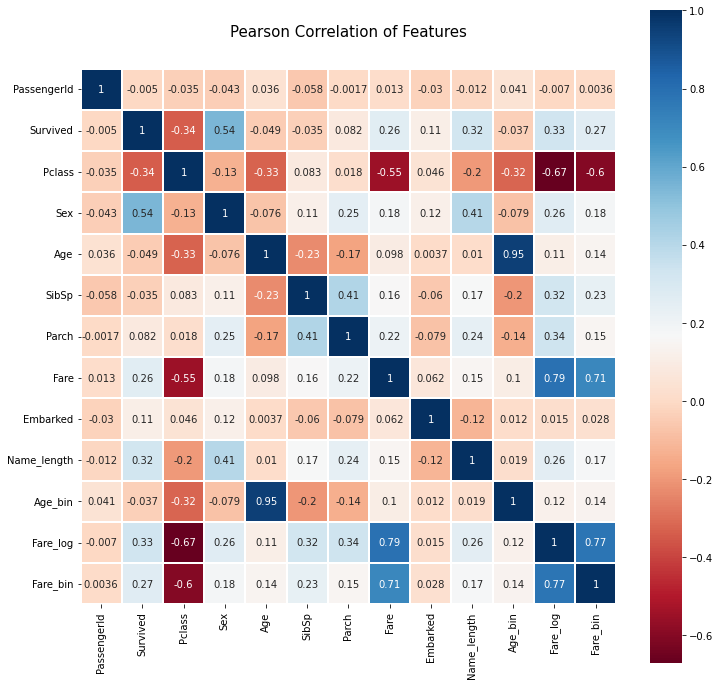

In [40]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

We can see from the survived column, that it has strong relation with sex and potential relation with class (or fare).

### Features Selection
We will drop the features that are not correlated with our dataset.

In [41]:
# Feature selection

original_train = train.copy(deep=True)
original_test = test.copy(deep=True)
drop_elements = ['PassengerId', 'SibSp', 'Parch', 'Age', 'Age_bin','Embarked']
try: 
  train = train.drop(drop_elements, axis = 1)
  test  = test.drop(drop_elements, axis = 1)
except:
  print("The features are already removed.")

Exploring the dataset after removing features

In [42]:
test.sample(5)

,Pclass,Sex,Fare,Name_length,Fare_log,Fare_bin
341,3,0,7.5792,1,2.025408,0
375,1,1,262.3750,1,5.569775,1
213,2,1,26.0000,3,3.258097,0
205,1,0,25.7417,1,3.248112,0
197,3,1,7.7750,1,2.050913,0


## Predictive Modelling

In [43]:
import sklearn # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


### Implementation: Shuffle and Split Data

The next step requires that we take the train dataset and split the data into training and validation subsets. We should do this because we want to test how well our model generalizes to unseen data.

Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the data into training and validation sets.

Careful there are 3 Datasets, training, validation and testing. Eventhough the method is called train_test_split we will split into train and validation
* Split the data into 70% training and 30% validation.
* Set the *random_state* for train_test_split to 101. This ensures results are consistent over multiple runs.



In [44]:
from sklearn.model_selection import train_test_split

def create_dataset_split(dataset):
    X = dataset.drop("Survived", axis=1)
    y = dataset["Survived"]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)
    return X_train, X_val, y_train, y_val

* Accuracy Function
* Logistic Regression
* SVM
* Decision Tree / Random Forest
* Perceptron

###  Logistic Regression

Logistic regression is machine learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (survived) or 0 (not survived). In other words, the logistic regression model predicts P(Y=1) as a function of X (Features). This makes it a  binary classifier.

In [45]:
for i in ["original_data", "feature_selection"]:
    dataset = train if i == "feature_selection" else original_train
    X_train, X_val, y_train, y_val = create_dataset_split(dataset)
    
    logreg = LogisticRegression(solver="newton-cg")
    logreg.fit(X_train, y_train)
    
    print("The accuracy on our training dataset if we use ", i, " is {}%".format(round(logreg.score(X_train, y_train) * 100, 2)))
    print("The accuracy on our validation dataset if we use ",i," is {}% \n".format(round(logreg.score(X_val, y_val) * 100, 2)))

The accuracy on our training dataset if we use  original_data  is 81.38%
The accuracy on our validation dataset if we use  original_data  is 76.49% 

The accuracy on our training dataset if we use  feature_selection  is 79.94%
The accuracy on our validation dataset if we use  feature_selection  is 77.61% 



### Decision Tree
Decision tree classifiers are attractive models if we care about interpretability. As
the name decision tree suggests, we can think of this model as breaking down our
data by making decisions based on asking a series of questions.

In [46]:
for i in ["original_data", "feature_selection"]:
    dataset = train if i == "feature_selection" else original_train
    X_train, X_val, y_train, y_val = create_dataset_split(dataset)
    
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    
    print("The accuracy on our training dataset if we use ", i, " is {}%".format(round(decision_tree.score(X_train, y_train) * 100, 2)))
    print("The accuracy on our validation dataset if we use ", i, " is {}% \n".format(round(decision_tree.score(X_val, y_val) * 100, 2)))    

The accuracy on our training dataset if we use  original_data  is 100.0%
The accuracy on our validation dataset if we use  original_data  is 75.0% 

The accuracy on our training dataset if we use  feature_selection  is 93.74%
The accuracy on our validation dataset if we use  feature_selection  is 74.63% 



### Random Forest
Multiple Decision Trees --> See lecture

In [47]:
from sklearn.ensemble import RandomForestClassifier

for i in ["original_data", "feature_selection"]:
    dataset = train if i == "feature_selection" else original_train
    X_train, X_val, y_train, y_val = create_dataset_split(dataset)

    random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                        max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                        min_impurity_decrease=0.0,
                        min_samples_leaf=5, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=6,
                        n_jobs=None, oob_score=False, random_state=6,
                        verbose=0, warm_start=False)
    random_forest.fit(X_train, y_train)
    print("The accuracy on our training dataset if we use ", i, " is {}%".format(round(random_forest.score(X_train, y_train) * 100, 2)))
    print("The accuracy on our validation dataset if we use ", i ," is {}% \n".format(round(random_forest.score(X_val, y_val) * 100, 2)))

The accuracy on our training dataset if we use  original_data  is 88.28%
The accuracy on our validation dataset if we use  original_data  is 75.75% 

The accuracy on our training dataset if we use  feature_selection  is 85.07%
The accuracy on our validation dataset if we use  feature_selection  is 81.34% 



### Perceptron
The perceptron is a supervised binary classifier (single-layer neural network).

In [48]:
for i in ["original_data", "feature_selection"]:
    dataset = train if i == "feature_selection" else original_train
    X_train, X_val, y_train, y_val = create_dataset_split(dataset)
    
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)
    
    print("The accuracy on our training dataset if we use ", i, " is {}%".format(round(perceptron.score(X_train, y_train) * 100, 2)))
    print("The accuracy on our validation dataset if we use ", i ," is {}% \n".format(round(perceptron.score(X_val, y_val) * 100, 2)))

The accuracy on our training dataset if we use  original_data  is 64.21%
The accuracy on our validation dataset if we use  original_data  is 57.84% 

The accuracy on our training dataset if we use  feature_selection  is 74.48%
The accuracy on our validation dataset if we use  feature_selection  is 69.4% 



### Support Vector Machines 
Support Vector Machines (SVM) are kernel based methods that require only a user-specified kernel function $K$ i.e., a similarity function over pairs of data points into a kernel (dual) space on which the learning algorithms operate linearly.

In [49]:
for i in ["original_data", "feature_selection"]:
    dataset = train if i == "feature_selection" else original_train
    X_train, X_val, y_train, y_val = create_dataset_split(dataset)
    
    svc=SVC(gamma="auto",probability=True)
    svc.fit(X_train, y_train)
    
    print("The accuracy on our training dataset if we use ", i, " is {}%".format(round(svc.score(X_train, y_train) * 100, 2)))
    print("The accuracy on our validation dataset if we use ", i ," is {}% \n".format(round(svc.score(X_val, y_val) * 100, 2)))    

The accuracy on our training dataset if we use  original_data  is 99.52%
The accuracy on our validation dataset if we use  original_data  is 57.09% 

The accuracy on our training dataset if we use  feature_selection  is 84.11%
The accuracy on our validation dataset if we use  feature_selection  is 75.75% 



## Inference on Test Dataset

We used the validation dataset to find out the best machine learning model. Use this model to predict survival status for the test dataset (and upload the prediction to [kaggle](https://www.kaggle.com/competitions/titanic/leaderboard))

In [50]:
random_forest.predict(test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Let's predict the fates of Leonardo di Caprio and Kate Winslet

### di Caprios features
- Name: Dawson, Mr. Jack
- Pclass: 3
- Sex: 0
- Fare: ???
- Name_length: 0
- Fare_log: ???
- Fare_bin: ??? 

In [51]:
jacks_name = len("Dawson, Mr. Jack")
jacks_name_length = 0
    
def get_average_fares(pclass):
    # Who is traveling in the given class
    people_in_this_class = np.where(train["Pclass"] == pclass)[0]
    # Calculate their average fare
    avg_fare = np.take(train["Fare"],people_in_this_class).mean()
    avg_log_fare = np.log(avg_fare)
    avg_fare_bin = 0 if avg_log_fare <= 3.8 else 1
    return avg_fare, avg_log_fare, avg_fare_bin

# get average fares for third class
jacks_fare, jacks_log_fare, jacks_fare_bin = get_average_fares(3)

## diCaprios features
jacks_input = [3, 0, jacks_fare, jacks_name_length, jacks_log_fare, jacks_fare_bin]


# Create new DataFrame with the same column names but our new input
input_columns = [x for x in X_train.columns]
jacks_dataframe = pd.DataFrame([jacks_input], columns=input_columns)
jacks_dataframe

,Pclass,Sex,Fare,Name_length,Fare_log,Fare_bin
0,3,0,13.67555,0,2.61561,0


# Kate Winslet
- Name: Bukater, Miss. Rose DeWitt 
- Pclass: 1
- Sex: 1
- Fare: ???
- Name_length: 1
- Fare_log: ???
- Fare_bin: ??? 

In [52]:
roses_name = ("Bukater, Miss. Rose DeWitt")
roses_name_length = 1

# get average fars for first class
roses_fare, roses_log_fare, roses_fare_bin = get_average_fares(1)
roses_input = [1, 1, roses_fare, roses_name_length, roses_log_fare, roses_fare_bin]

# Create new DataFrame with those column names and our new input
input_columns = [x for x in X_train.columns]
roses_dataframe = pd.DataFrame([roses_input], columns=input_columns)
roses_dataframe

,Pclass,Sex,Fare,Name_length,Fare_log,Fare_bin
0,1,1,84.154687,1,4.432657,1


In [53]:
def survival_predictions(input_dataframe):
    print("\t lr predicts chance of survival = ", round(logreg.predict_proba(input_dataframe)[0,1]*100,2),"%")
    print("\t decision tree predicts: ", "deceased" if decision_tree.predict(input_dataframe) == 0 else "survived")
    print("\t random forest predicts: ", "deceased" if random_forest.predict(input_dataframe) == 0 else "survived")
    print("\t perceptron predicts: ", "deceased" if perceptron.predict(input_dataframe) == 0 else "survived")
    print("\t svm predicts chance of survival = ",  round(svc.predict_proba(input_dataframe)[0,1]*100,2),"%")

print("let's calculate Jack's chance of survival")
survival_predictions(jacks_dataframe)

let's calculate Jack's chance of survival
	 lr predicts chance of survival =  7.74 %
	 decision tree predicts:  deceased
	 random forest predicts:  deceased
	 perceptron predicts:  deceased
	 svm predicts chance of survival =  15.33 %


In [54]:
print("lets calculate Rose's chance of survival")
survival_predictions(roses_dataframe)

lets calculate Rose's chance of survival
	 lr predicts chance of survival =  88.85 %
	 decision tree predicts:  survived
	 random forest predicts:  survived
	 perceptron predicts:  survived
	 svm predicts chance of survival =  73.73 %


# Conclusion
*  Machine Learning is about algorithms that are capable to learn from data, instead of having to explicitly code rules.
* In an ML project you gather data in a training set, and you feed the training set to a learning algorithm.
* The system will not perform well if your training set is too small, or if the data is not representative, noisy, or polluted with irrelevant features (garbage in, garbage out). 
* Lastly, your model needs to be neither too simple (in which case it will underfit) nor too complex (in which case it will overfit).